# 利用神经网络逼近股票收盘价格

In [1]:
'''
有十五天的数据
    横坐标为 天数  从1到15
    纵坐标为 价格

'''

'\n有十五天的数据\n    横坐标为 天数  从1到15\n    纵坐标为 价格\n\n'

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


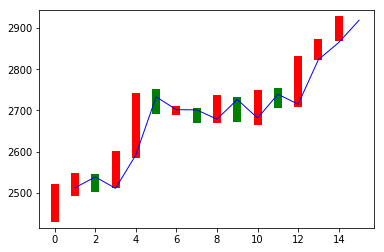

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = np.linspace(1,15,15) #用data矩阵记录天数，linspace ：从1到15，一共15个数据
#收盘价格
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
#开盘价格
beginPrice = np.array([2438.71,2500.88,2534.95,2521.52,2594.04,2743.26,2697.47,2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])
print(data)
plt.figure()
for i in range(0,15):           #绘制柱状图 有x和y坐标，且x，y坐标都是二维的
    dataOne = np.zeros([2])     #dataOne矩阵有两个数据,代表着同一天
    dataOne[0] = i              #所以两个数据都是相同的
    dataOne[1] = i
    pricreOne = np.zeros([2])
    pricreOne[0] = beginPrice[i] #princeOne第一个数据放的是开盘价格
    pricreOne[1] = endPrice[i]   #princeOne第二个数据放的是收盘价格
    if endPrice[i] > beginPrice[i] :          #如果当天收盘价格大于开盘价格
        plt.plot(dataOne,pricreOne,'r',lw=8)   #则说明上涨了，所以用红色来绘制

    else:                                     #如果当天收盘价格小于开盘价格
        plt.plot(dataOne,pricreOne,'g',lw=8)   #则说明下跌了，所以用绿色来绘制
#plt.show()      #绘图
'''
神经网络
公式：A :输入层 B :隐藏层 C :输出层 w1w2权重 b1b2偏移值
     A(15x1)  * w1(1x10) + b1(1x10) =B(15x10)   ①
     B(15x10) * w2(10x1) + b2(15x1) =C(15x1)    ②
因此，按照公式即可实现
'''
#为了方便计算，先把数据归一化
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
for i in range(0,15):
    dateNormal[i,0] = i/14.0                    #日期从0开始，所以除以14
    priceNormal[i,0] = endPrice[i]/3000.0       #价格不超过3000

x = tf.placeholder(tf.float32,[None,1])    #数据的装载。x轴，表示天数，N行1列
y = tf.placeholder(tf.float32,[None,1])

#隐藏层
w1 = tf.Variable(tf.random_uniform([1,10],0,1))     #因为要不断的更新w和b，所以都是变量。一行十列的矩阵，范围从0到1之间
b1 = tf.Variable(tf.zeros([1,10]))
wb1 = tf.matmul(x,w1)+b1                    #由公式①已知
layer1 = tf.nn.relu(wb1)                    #激励函数

#输出层
w2 = tf.Variable(tf.random_uniform([10,1],0,1))
b2 = tf.Variable(tf.zeros([15,1]))
wb2 = tf.matmul(layer1,w2)+b2
layer2 = tf.nn.relu(wb2)

#算出神经网络得到的数 与 实际的数 的差值，从而调整w 和 b
loss = tf.reduce_mean(tf.square(y-layer2))   #实际上是用实际的值减去预测的值 开方，再进行均值
#训练的步骤：使用梯度下降法，其中的参数是 每次调整多少，目标是缩小loss
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #给变量初始化
    for i in range(0,10000):                    #训练10000次
        sess.run(train_step,feed_dict={x:dateNormal,y:priceNormal})     #训练需要输入x，且会得到一个相对精确的w1w2b1b2

    pred = sess.run(layer2,feed_dict={x:dateNormal})#检测新的w1w2b1b2,所以再给它输入层x,得到一个新的预测值,且放到layer2中
    #为了鉴定预测值，所以把它绘制为图像
    predPrice = np.zeros([15,1])
    for i in range(0,15):                #矩阵索引从0到14
        predPrice[i,0]=(pred*3000)[i,0]  #由于之前归一化，所以现在要把它变回3000
    plt.plot(data,predPrice,'b',lw=1)
plt.show()
